# **Feature Engineering : Logistics Service Provider**

A popular logistics service provider in india is keen on comprehending and processing the information derived from data engineering pipelines. The process involves the purification, sanitization, and manipulation of data to extract valuable features from raw fields. The objective is to make the raw data meaningful and assist the data science team in constructing forecasting models.

**Column Profiling**:

•	data - tells whether the data is testing or training data

•	trip_creation_time – Timestamp of trip creation

•	route_schedule_uuid – Unique Id for a particular route schedule

•	route_type – Transportation type

  - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

  - Carting - Handling system consisting of small vehicles (carts)

•	trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centres)

•	source_center - Source ID of trip origin

•	source_name - Source Name of trip origin

•	destination_cente – Destination ID

•	destination_name – Destination Name

•	od_start_time – Trip start time

•	od_end_time – Trip end time

•	start_scan_to_end_scan – Time taken to deliver from source to destination

•	is_cutoff – Unknown field

•	cutoff_factor – Unknown field

•	cutoff_timestamp – Unknown field

•	actual_distance_to_destination – Distance in Kms between source and destination warehouse

•	actual_time – Actual time taken to complete the delivery (Cumulative)

•	osrm_time – An *open-source routing engine* time calculator which
computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

•	osrm_distance – An *open-source routing engine* which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

•	factor – Unknown field

•	segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

•	segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

•	segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

•	segment_factor – Unknown field

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

## **Basic data cleaning and exploration**


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Removing "**Unknown**" fields


In [ ]:
df.drop(columns=['is_cutoff', 'cutoff_factor','cutoff_timestamp','factor','segment_factor'], axis=1, inplace=True)

shape of dataset after removing unwanted columns


In [ ]:
df.shape

(144867, 19)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

converting the data, route_type type columns to category


In [ ]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

Updating the datatype of the datetime columns


In [ ]:
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
# df.trip_creation_time.min(), df.trip_creation_time.max()

Handling Missing Values

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

Basic Description & Statistical Summary

In [ ]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
std,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700


In [ ]:
df.describe(include=object)

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316
unique,1497,14787,1496,1496,1466,1466
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23267,23267,15192,15192




---



## **Feature Extraction**

Merging of Rows and Aggregation of fields

In [ ]:
group_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = group_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})

In [ ]:
df1.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'route_type', 'trip_creation_time', 'source_name', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance'],
      dtype='object')

Time taken between od_start_time and od_end_time is taken as a new feature ' od_total_time '

In [ ]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


**Source Name**: Splitting and extracting features out of destination. City-place-code (State)

In [ ]:
def loc_name_to_state(x):
  l = x.split("(")
  if len(l) == 1:
      return l[0]
  else:
      return l[1].replace(')', "")

In [ ]:
def loc_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [ ]:
def loc_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [ ]:
df2['source_state'] = df2['source_name'].apply(loc_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland'],
      dtype=object)

In [ ]:
df2['source_city'] = df2['source_name'].apply(loc_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:50]

No of source cities : 687


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat'],
      dtype=object)

In [ ]:
df2['source_place'] = df2['source_name'].apply(loc_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

**Destination Name**: Splitting and extracting features out of destination. City-place-code (State)

In [ ]:
df2['destination_state'] = df2['destination_name'].apply(loc_name_to_state)
df2['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [ ]:
df2['destination_city'] = df2['destination_name'].apply(loc_name_to_city)
df2['destination_city'].head(10)

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
5       Chennai
6       Chennai
7     Bengaluru
8         Surat
9         Delhi
Name: destination_city, dtype: object

In [ ]:
df2['destination_place'] = df2['destination_name'].apply(loc_name_to_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

**Trip_creation_time**: Extracting features month, year and day...etc

extracting date from trip_creation_time

In [ ]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

extracting day from trip_creation_time


In [ ]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

extracting month from trip_creation_time

In [ ]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

extracting year from trip_creation_time

In [ ]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

extracting hour from trip_creation_time

In [ ]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

extracting week from trip_creation_time

In [ ]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

extracting day of week from trip_creation_time

In [ ]:
df2['trip_creation_dayname'] = df2['trip_creation_time'].dt.day_name()
df2['trip_creation_dayname'] = df2['trip_creation_dayname'].astype('str')
df2['trip_creation_dayname'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: trip_creation_dayname, dtype: object

In [ ]:
df2.shape

(14787, 30)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   source_center                   14787 non-null  object        
 2   destination_center              14787 non-null  object        
 3   data                            14787 non-null  category      
 4   route_type                      14787 non-null  category      
 5   trip_creation_time              14787 non-null  datetime64[ns]
 6   source_name                     14787 non-null  object        
 7   destination_name                14787 non-null  object        
 8   od_total_time                   14787 non-null  float64       
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  actual_distance_to_destination  14787 non-null  float64       
 11  ac

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
trip_creation_day,14787.0,18.375127,7.882198,1.000000,14.000000,19.000000,25.000000,30.000000


In [ ]:
df2.describe(include=object).T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
destination_center,14787,1035,IND000000ACB,821
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
source_city,14787,687,Mumbai,1442
source_place,14787,755,Bilaspur_HB,1052
destination_state,14787,31,Maharashtra,2561
destination_city,14787,805,Mumbai,1548




---



## **Exploratory Data Analysis**

### Number of Trips on Hourly Basis

In [ ]:
df2.trip_creation_hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [ ]:
df_hour = df2.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,991
1,1,748
2,2,702
3,3,651
4,4,635


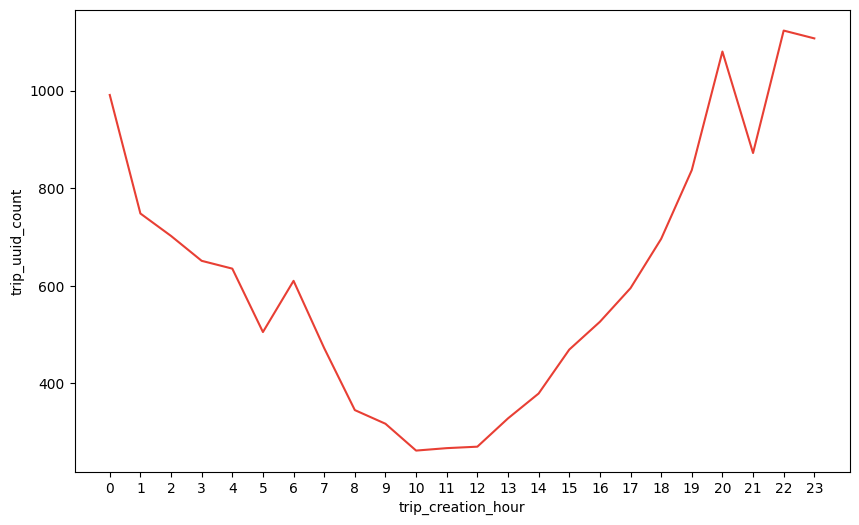

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_hour, x='trip_creation_hour',y='trip_uuid', color = '#e83f34')
plt.ylabel('trip_uuid_count')
plt.xticks(np.arange(0,24))
plt.show()

**Observations**:

- It is observed that creation of trips start increasing from 12 pm
- There is a considerable dip in the number of trip creations at 9 pm but again started increasing till 10 pm
- Least number of trips were created between 10 am - 12 pm

### Number of Trips by Day of Week

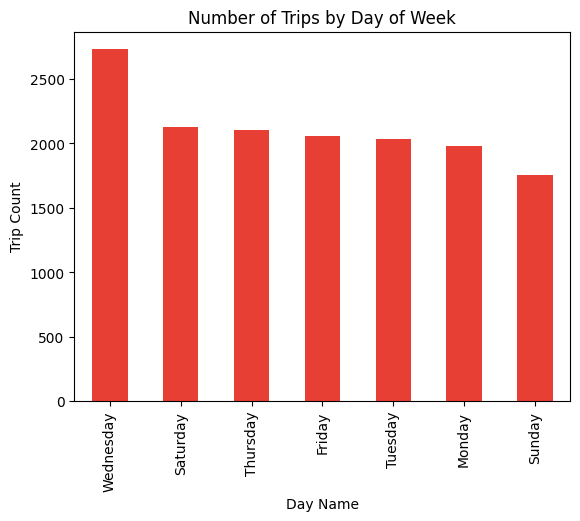

In [ ]:
weekly_trip_count = df2.trip_creation_dayname.value_counts()
weekly_trip_count.plot(kind='bar',color = '#e83f34' )
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day Name')
plt.ylabel('Trip Count')
plt.show()

**Observations**:

- Most of the trips are created on **Wednesday**, followed by **Saturday**
- Least number of trips are created on **Sunday**

### Number of trips created for different days of the month  

In [ ]:
df2['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [ ]:
df_day = df2.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,1,600
1,2,549
2,3,627
3,12,747
4,13,750


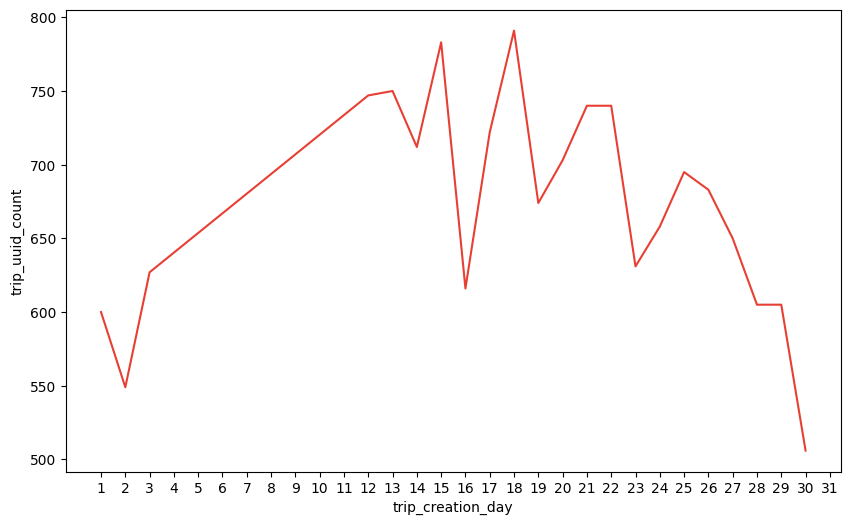

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_day, x='trip_creation_day',y='trip_uuid', color = '#e83f34')
plt.ylabel('trip_uuid_count')
plt.xticks(np.arange(1,32))
plt.show()

**Observations**

- Most trips are created in the **middle** of the month  
- Least number of trips are created in the **start** and at the **end** of the month

### Number of trips for different weeks

In [ ]:
df2['trip_creation_week'].unique()

array([37, 38, 39, 40], dtype=int8)

In [ ]:
df_week = df2.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
df_week.head()

,trip_creation_week,trip_uuid
0,37,3608
1,38,5001
2,39,4402
3,40,1776


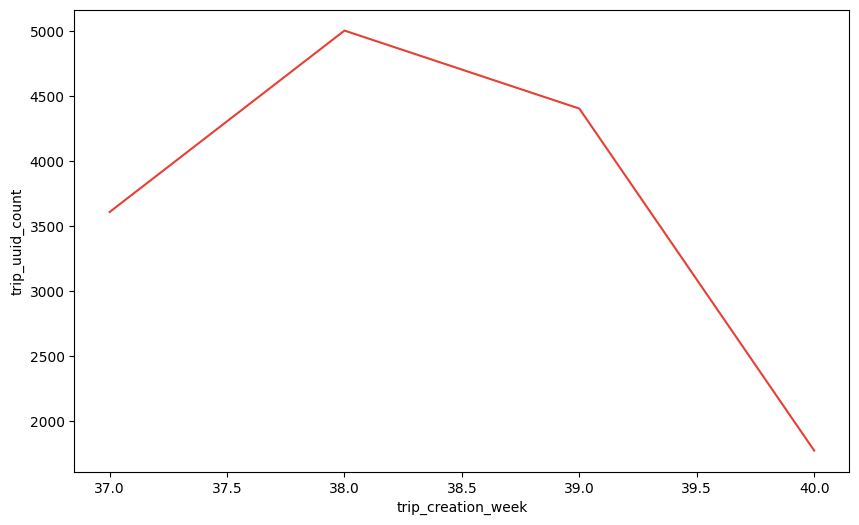

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_week, x='trip_creation_week',y='trip_uuid', color = '#e83f34')
plt.ylabel('trip_uuid_count')
plt.show()

**Observations**
- It can be inferred from the above plot that most of the trips are created in the **38th** week


### Number of trips created in the given two months

In [ ]:
df_month = df2.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()

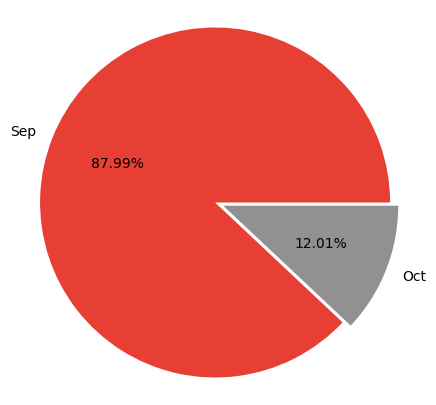

In [ ]:
df_month['percentage'] = df_month['trip_uuid'] / df_month['trip_uuid'].sum() * 100
plt.figure(figsize=(5, 5))
plt.pie(df_month['percentage'], labels = ['Sep','Oct'], autopct='%.2f%%', colors=['#e83f34','#919191'],explode=[0,0.05])
plt.axis('equal')
plt.show()

**Observations**
- From the data it is evident that **September** has most trips

### Number of Trips by Transportation Type

In [ ]:
df_route = df2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['percentage'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,percentage
0,Carting,8906,60.23
1,FTL,5881,39.77


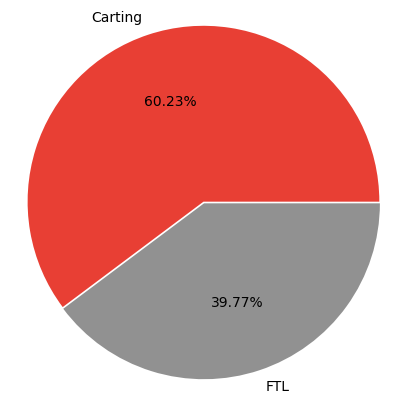

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(df_route['percentage'], labels = ['Carting', 'FTL'], autopct='%.2f%%', colors=['#e83f34','#919191'],explode=[0,0.01])
plt.axis('equal')
plt.show()

**Observations**
- Around 60.23% of trips are transported by **Carting** and the rest 39.77% are transported by **FTL**

### Number of Trips by Different *Source* States

In [ ]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.35
14,Karnataka,2143,14.49
10,Haryana,1823,12.33
24,Tamil Nadu,1039,7.03
25,Telangana,784,5.30


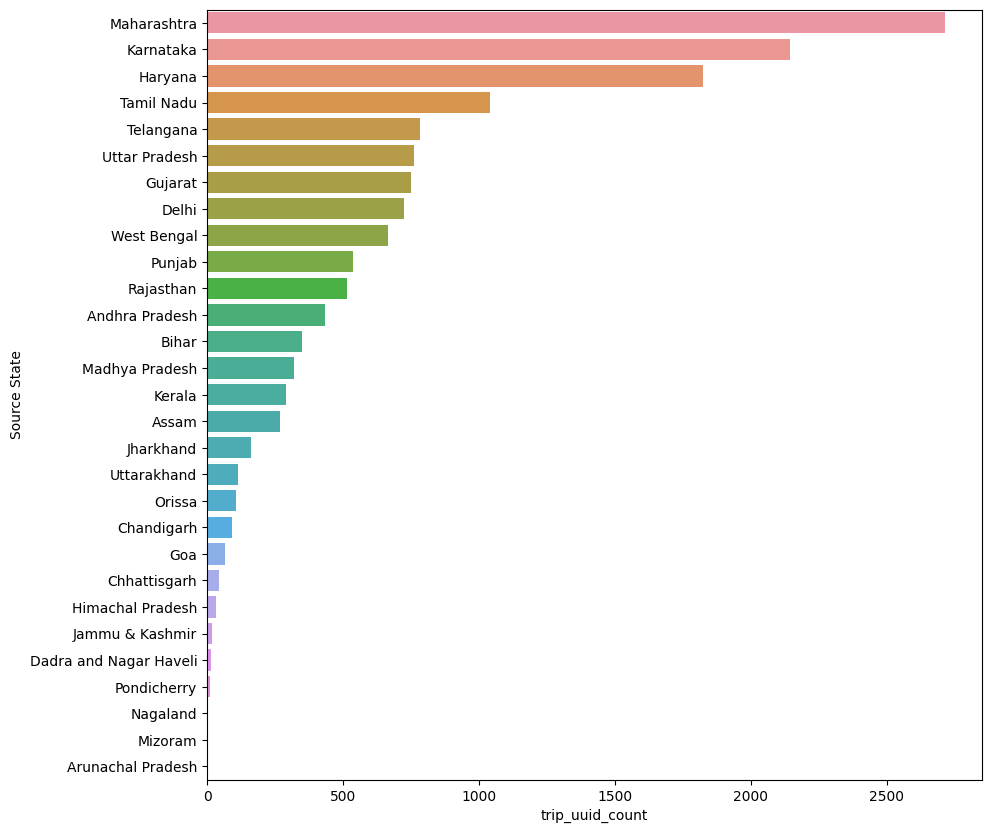

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_state, x = df_source_state['trip_uuid'], y = df_source_state['source_state'])
plt.ylabel('Source State')
plt.xlabel('trip_uuid_count')
plt.show()

**Observations**
- **Maharasthra, Karnataka, Haryana, Tamilnadu and Telangana** are the *Top 5* states as source state w.r.t number of trips
- **Dadra and Nagar Haveli, Pondicherry, Mizoram, Nagaland and Arunachal Pradesh** are the states with the least number of trips as source state

### Number of Trips by Different *Source* Cities (Top 15)

In [ ]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:15]
df_source_city

,source_city,trip_uuid,perc
436,Mumbai,1442,9.75
235,Gurgaon,1154,7.80
167,Delhi,880,5.95
77,Bengaluru,726,4.91
98,Bhiwandi,697,4.71
56,Bangalore,648,4.38
134,Chennai,568,3.84
262,Hyderabad,524,3.54
514,Pune,480,3.25
354,Kolkata,356,2.41


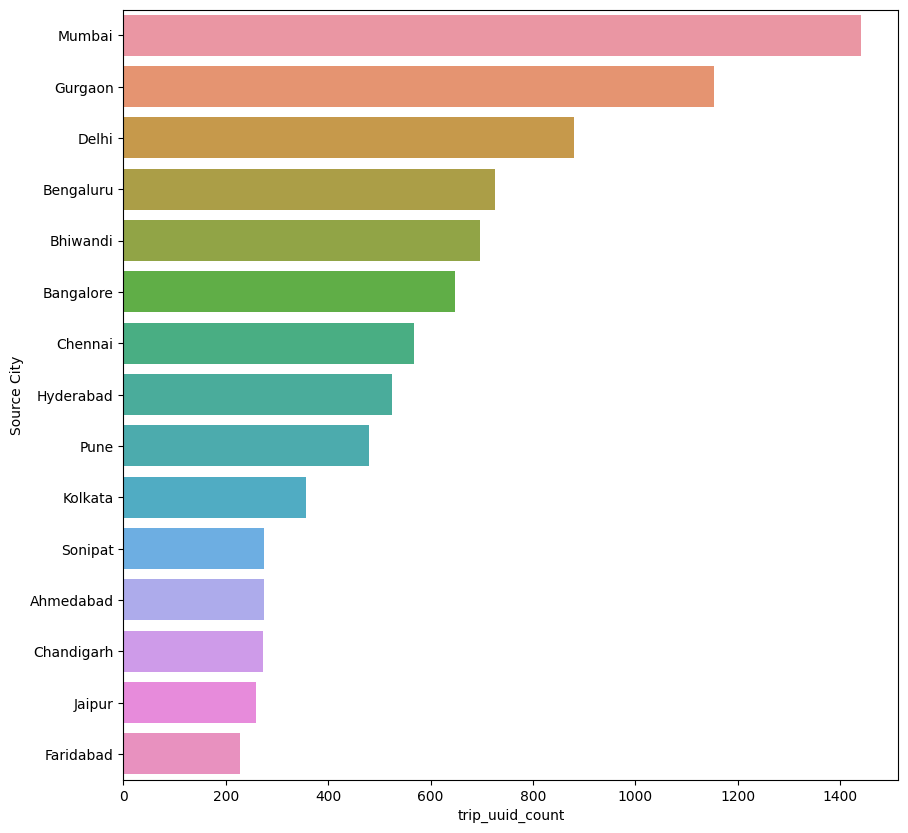

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city, x = df_source_city['trip_uuid'], y = df_source_city['source_city'])
plt.ylabel('Source City')
plt.xlabel('trip_uuid_count')
plt.show()

**Observations**
- **Mumbai, Gurgaon, Delhi, Bangalore, Bhiwandi, Bengaluru** are the Top 5 cities as source cities w.r.t number of trips

### Number of Trips by Different *Destination* States

In [ ]:
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head()

,destination_state,trip_uuid,perc
18,Maharashtra,2561,17.32
15,Karnataka,2294,15.51
11,Haryana,1640,11.09
25,Tamil Nadu,1084,7.33
28,Uttar Pradesh,805,5.44


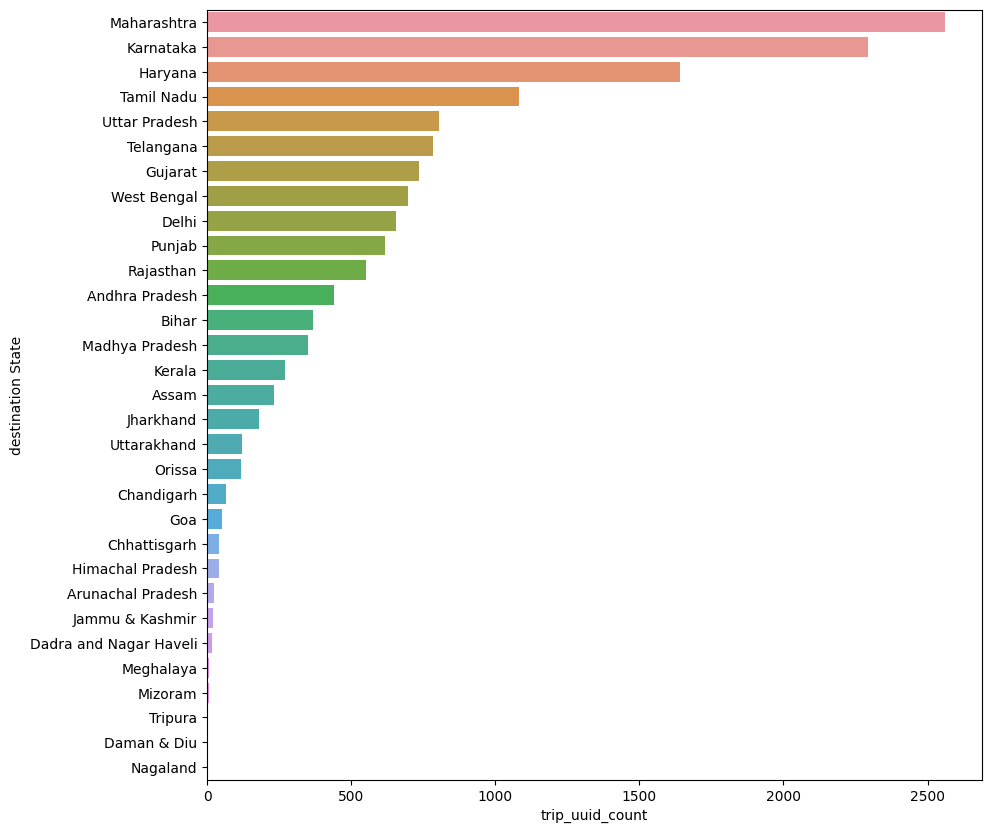

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_state, x = df_destination_state['trip_uuid'], y = df_destination_state['destination_state'])
plt.ylabel('destination State')
plt.xlabel('trip_uuid_count')
plt.show()

**Observations**
- **Maharasthra, Karnataka, Haryana, Tamilnadu and Uttar Pradesh** are the Top 5 states as destination states w.r.t number of trips
- **Meghalaya, Mizoram, Tripura, Daman & Diu, Nagaland** are the states with the least number of trips as destination states

### Number of Trips by Different *Destination* Cities (Top 15)

In [ ]:
df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:15]
df_destination_city

,destination_city,trip_uuid,perc
513,Mumbai,1548,10.47
96,Bengaluru,974,6.59
280,Gurgaon,936,6.33
199,Delhi,783,5.30
163,Chennai,595,4.02
72,Bangalore,551,3.73
305,Hyderabad,503,3.40
115,Bhiwandi,434,2.94
417,Kolkata,384,2.60
158,Chandigarh,339,2.29


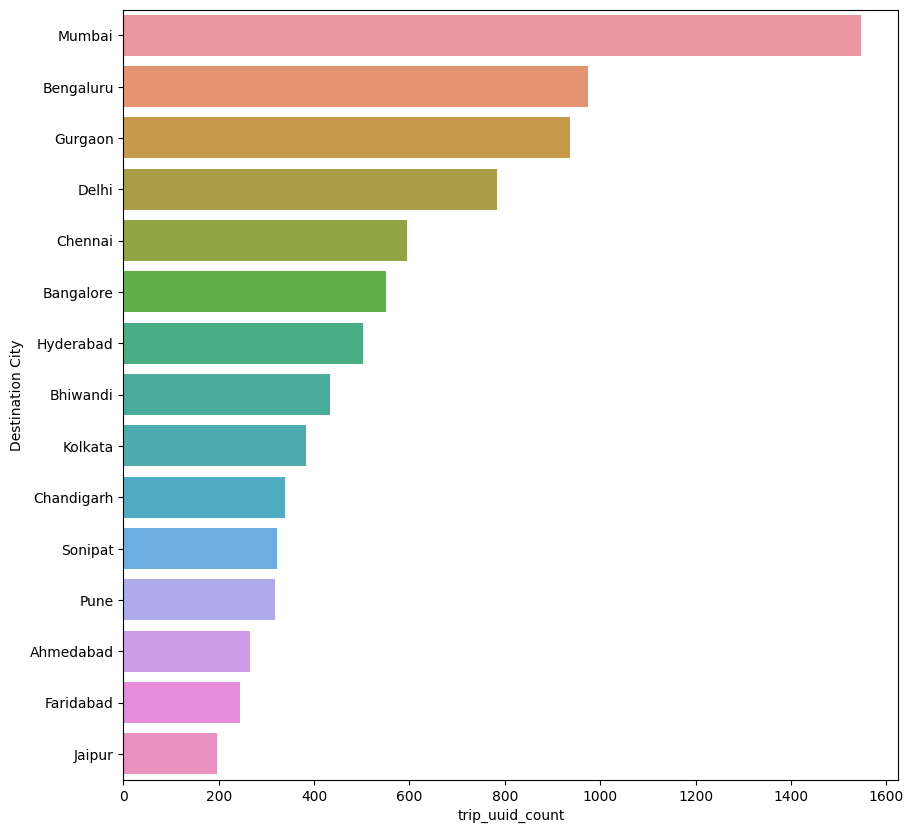

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city, x = df_destination_city['trip_uuid'], y = df_destination_city['destination_city'])
plt.ylabel('Destination City')
plt.xlabel('trip_uuid_count')
plt.show()

**Observations**
- **Mumbai, Bengaluru, Gurgaon, Delhi and Chennai** are the Top 5 cities as destination cities w.r.t number of trips

### Correlation Matrix

In [ ]:
df2.describe()

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_week
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000,14787.000000
mean,530.313468,529.429025,164.090196,356.306012,160.990938,203.887411,353.059174,180.511598,222.705466,18.375127,9.120105,2018.0,12.456212,38.293907
std,658.415416,658.254936,305.502982,561.517936,271.459495,370.565564,556.365911,314.679279,416.846279,7.882198,0.325096,0.0,7.987387,0.967366
min,23.460000,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,1.000000,9.000000,2018.0,0.000000,37.000000
25%,149.695000,149.000000,22.777099,67.000000,29.000000,30.756900,66.000000,30.000000,32.578850,14.000000,9.000000,2018.0,4.000000,38.000000
50%,279.710000,279.000000,48.287894,148.000000,60.000000,65.302800,147.000000,65.000000,69.784200,19.000000,9.000000,2018.0,14.000000,38.000000
75%,633.535000,632.000000,163.591258,367.000000,168.000000,206.644200,364.000000,184.000000,216.560600,25.000000,9.000000,2018.0,20.000000,39.000000
max,7898.550000,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,30.000000,10.000000,2018.0,23.000000,40.000000


In [ ]:
numerical_cols = [
    "od_total_time",
    "start_scan_to_end_scan",
    "actual_distance_to_destination",
    "actual_time",
    "osrm_time",
    "osrm_distance",
    "segment_actual_time",
    "segment_osrm_time",
    "segment_osrm_distance",
]

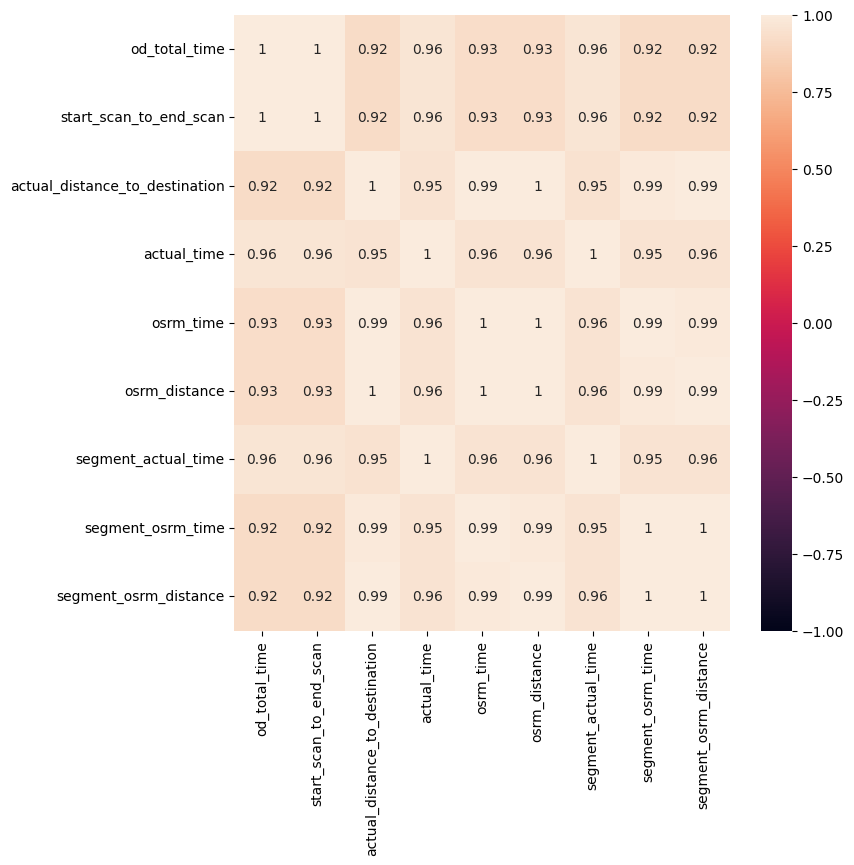

In [ ]:
plt.figure(figsize=(8,8))
df_corr = df2[numerical_cols].corr()
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.show()

**Observations**
- All the numerical variables have **High** correlation ( > 0.9 )



---



## **Hypothesis Testing**

### Hypothesis Testing between `od_total_time` and `start_scan_to_end_scan`

Formulation of Hypothesis

  • `Null Hypothesis (Ho)` : There is **"No"** difference between **'od_total_time' and 'start_scan_to_end_scan'**

  • `Alternate Hypothesis (Ha)` : There **'is'** difference between **'od_total_time' and 'start_scan_to_end_scan'**



Checking basic assumpitons for the hypothesis

- Normality check using **Q-Q Plot**

- Homogeneity of Variances using **Levene's test**

Checking Normality

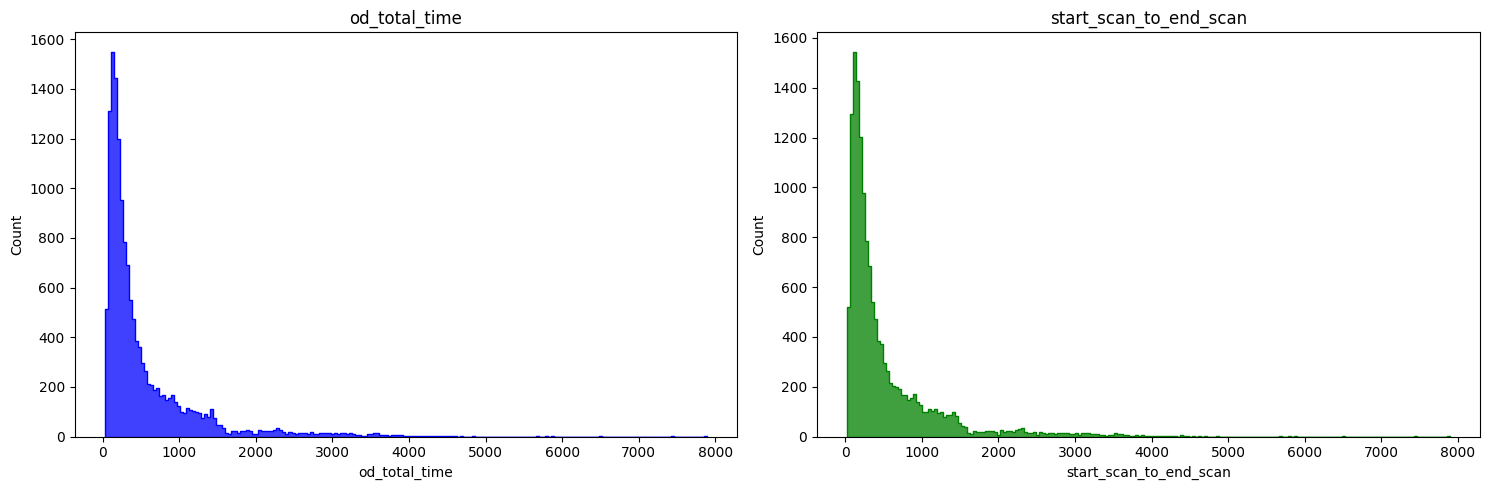

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df2['od_total_time'], element = 'step', color = 'blue', ax=axs[0])
axs[0].set_title('od_total_time')

sns.histplot(df2['start_scan_to_end_scan'], element = 'step', color = 'green', ax=axs[1])
axs[1].set_title('start_scan_to_end_scan')

plt.tight_layout()
plt.show()

Checking Normality using Q-Q Plot

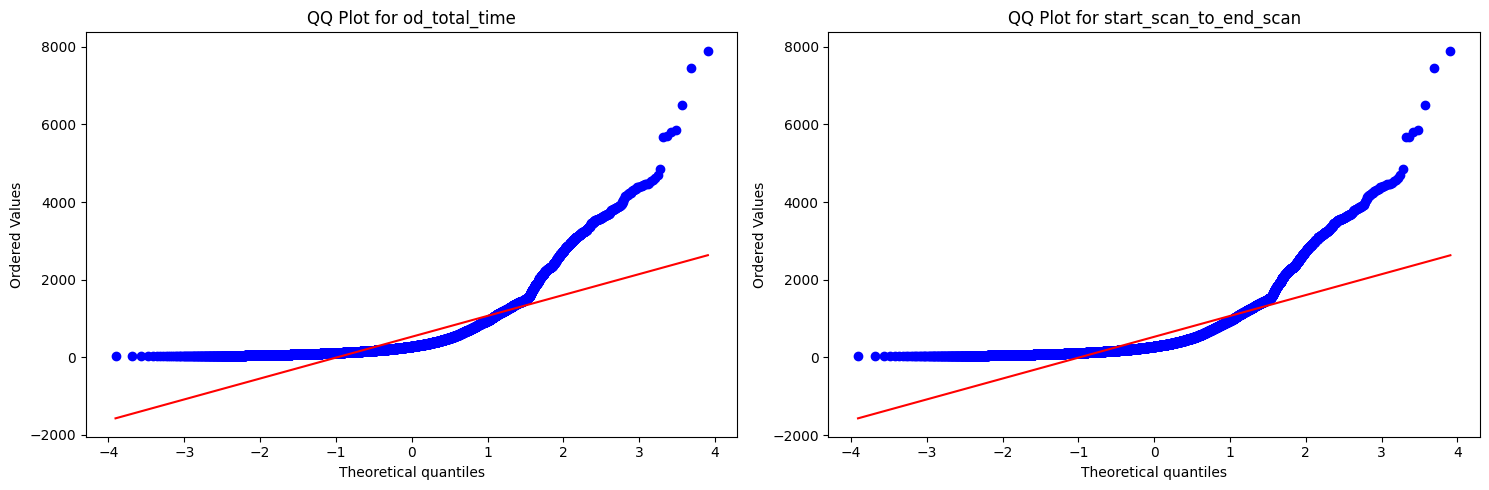

In [ ]:
import scipy.stats as stats
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

stats.probplot(df2['od_total_time'], plot=axs[0])
axs[0].set_title('QQ Plot for od_total_time')

stats.probplot(df2['start_scan_to_end_scan'], plot=axs[1])
axs[1].set_title('QQ Plot for start_scan_to_end_scan')

plt.tight_layout()
plt.show()

It is evident that above plots that the samples don't follow normal distribution.

Applying *Shapiro-Wilk* test for normality

 - Ho : The sample follows normal distribution

 - Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df2['od_total_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'od_total_time' looks Gaussian (fail to reject Ho)")
else:
    print("'od_total_time' does not look Gaussian (reject Ho)")

stat, p = shapiro(df2['start_scan_to_end_scan'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print("'start_scan_to_end_scan' looks Gaussian (fail to reject Ho)")
else:
    print("'start_scan_to_end_scan' does not look Gaussian (reject Ho)")

Statistics=0.667, p=0.000
'od_total_time' does not look Gaussian (reject Ho)
Statistics=0.667, p=0.000
'start_scan_to_end_scan' does not look Gaussian (reject Ho)


It is now obvious that both 'od_total_time' & 'start_scan_to_end_scan' **don't** follow Normal distribution

Homogeneity of Variances using *Levene's test*

In [ ]:
from scipy.stats import levene

stat, p = levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Variances for 'od_total_time' and 'start_scan_to_end_scan' are equal (fail to reject H0)")
else:
    print("Variances for 'od_total_time' and 'start_scan_to_end_scan' are not equal (reject H0)")

Statistics=0.002, p=0.967
Variances for 'od_total_time' and 'start_scan_to_end_scan' are equal (fail to reject H0)


- Variances for 'od_total_time' and 'start_scan_to_end_scan' are equal

Since the samples are not normally distributed, T-Test cannot be applied here, we can perform the Non-Parametrix test called *Kruskal-Wallis test*.

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'od_total_time' and 'start_scan_to_end_scan' are equal (fail to reject H0)")
else:
    print("'od_total_time' and 'start_scan_to_end_scan' are not equal (reject H0)")

Statistics=0.008, p=0.928
'od_total_time' and 'start_scan_to_end_scan' are equal (fail to reject H0)


#### **Observations**

- Since p-value > alpha therfore it can be concluded that `od_total_time` and `start_scan_to_end_scan` are **"Similar"**

### Hypothesis Testing between `actual_time` and `osrm_time`

Formulation of Hypothesis

  • `Null Hypothesis (Ho)` : There is **"No"** difference between **'actual_time' and 'osrm_time'**

  • `Alternate Hypothesis (Ha)` : There **'is'** difference between **'actual_time' and 'osrm_time'**



Checking Normality

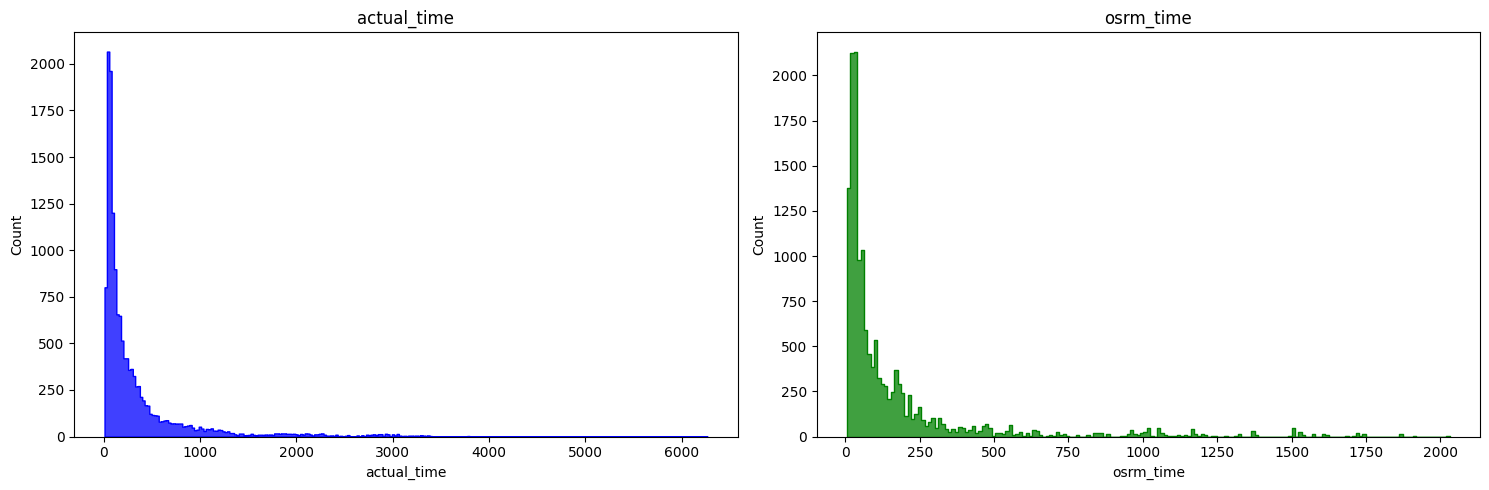

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df2['actual_time'], element = 'step', color = 'blue', ax=axs[0])
axs[0].set_title('actual_time')

sns.histplot(df2['osrm_time'], element = 'step', color = 'green', ax=axs[1])
axs[1].set_title('osrm_time')

plt.tight_layout()
plt.show()

Checking Normality using Q-Q Plot

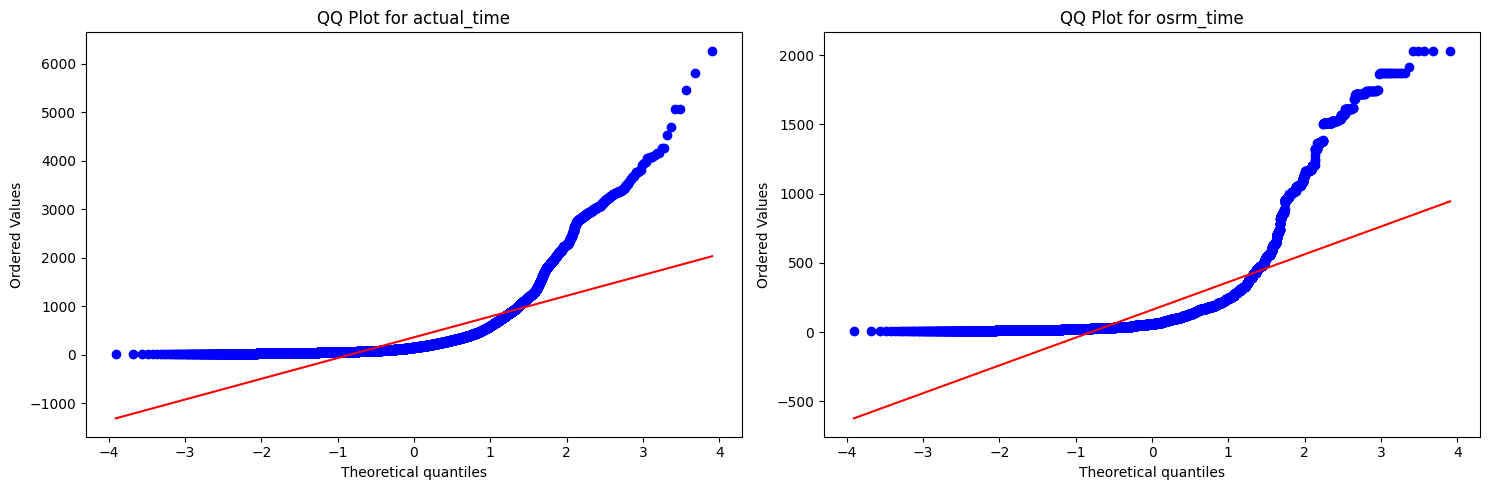

In [ ]:
import scipy.stats as stats
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

stats.probplot(df2['actual_time'], plot=axs[0])
axs[0].set_title('QQ Plot for actual_time')

stats.probplot(df2['osrm_time'], plot=axs[1])
axs[1].set_title('QQ Plot for osrm_time')

plt.tight_layout()
plt.show()

It is evident that above plots that the samples don't follow normal distribution.

Applying *Shapiro-Wilk* test for normality

Ho : The sample follows normal distribution

Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df2['actual_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'actual_time' looks Gaussian (fail to reject Ho)")
else:
    print("'actual_time' does not look Gaussian (reject Ho)")

stat, p = shapiro(df2['osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print("'osrm_time' looks Gaussian (fail to reject Ho)")
else:
    print("'osrm_time' does not look Gaussian (reject Ho)")

Statistics=0.580, p=0.000
'actual_time' does not look Gaussian (reject Ho)
Statistics=0.546, p=0.000
'osrm_time' does not look Gaussian (reject Ho)


It is now obvious that both 'actual_time' & 'osrm_time' don't follow Normal distribution

Homogeneity of Variances using *Levene's test*

In [ ]:
from scipy.stats import levene

stat, p = levene(df2['actual_time'], df2['osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Variances for 'actual_time' and 'osrm_time' are equal (fail to reject H0)")
else:
    print("Variances for 'actual_time' and 'osrm_time' are not equal (reject H0)")

Statistics=1013.846, p=0.000
Variances for 'actual_time' and 'osrm_time' are not equal (reject H0)


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform *Kruskal-Wallis* test.

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(df2['actual_time'], df2['osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'actual_time' and 'osrm_time' are equal (fail to reject H0)")
else:
    print("'actual_time' and 'osrm_time' are not equal (reject H0)")

Statistics=190.786, p=0.000
'actual_time' and 'osrm_time' are not equal (reject H0)


#### **Observations**

- Since p-value < alpha therfore it can be concluded that `actual_time` and `osrm_time` are **"Not Similar"**.

### Hypothesis Testing between `actual_time` and `segment_actual_time`

Formulation of Hypothesis

  • `Null Hypothesis (Ho)` : There is **"No"** difference between **'actual_time' and 'segment_actual_time'**

  • `Alternate Hypothesis (Ha)` : There **'is'** difference between **'actual_time' and 'segment_actual_time'**



Checking Normality

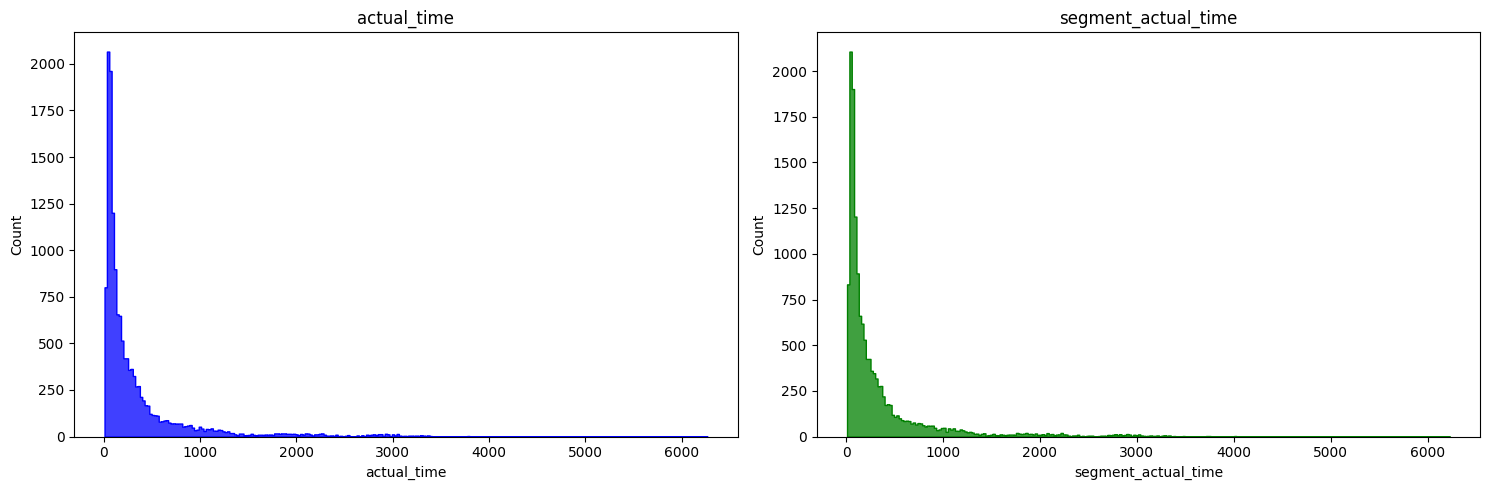

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df2['actual_time'], element = 'step', color = 'blue', ax=axs[0])
axs[0].set_title('actual_time')

sns.histplot(df2['segment_actual_time'], element = 'step', color = 'green', ax=axs[1])
axs[1].set_title('segment_actual_time')

plt.tight_layout()
plt.show()

Checking Normality using Q-Q Plot

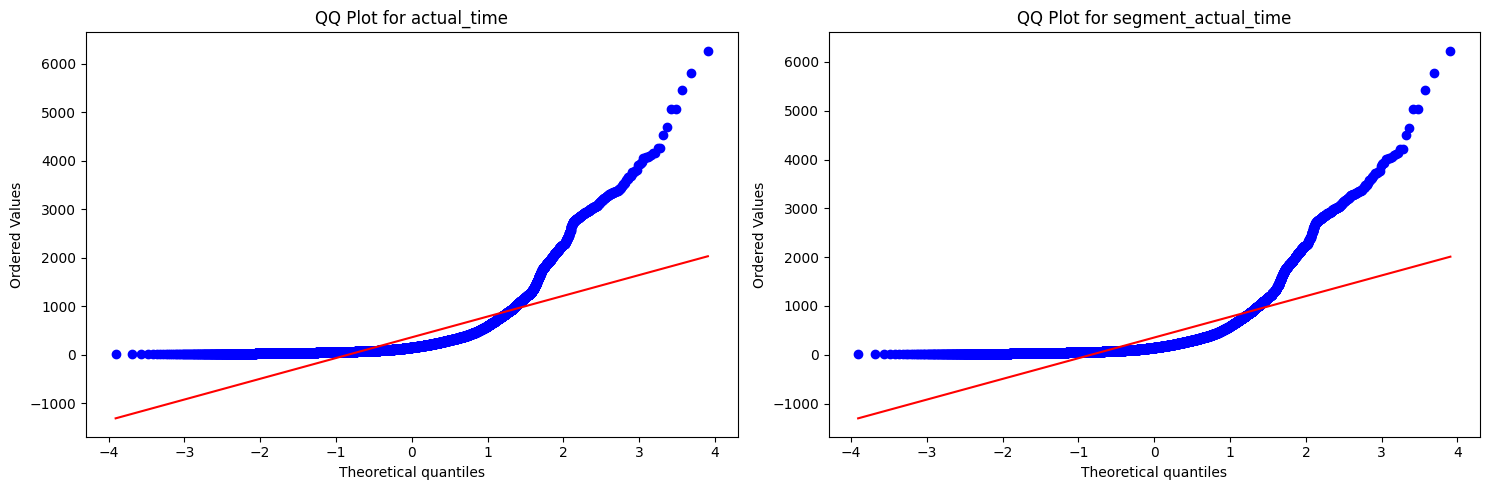

In [ ]:
import scipy.stats as stats
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

stats.probplot(df2['actual_time'], plot=axs[0])
axs[0].set_title('QQ Plot for actual_time')

stats.probplot(df2['segment_actual_time'], plot=axs[1])
axs[1].set_title('QQ Plot for segment_actual_time')

plt.tight_layout()
plt.show()

It is evident that above plots that the samples don't follow normal distribution.



Applying *Shapiro-Wilk* test for normality

 - Ho : The sample follows normal distribution

 - Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df2['actual_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'actual_time' looks Gaussian (fail to reject Ho)")
else:
    print("'actual_time' does not look Gaussian (reject Ho)")

stat, p = shapiro(df2['segment_actual_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print("'segment_actual_time' looks Gaussian (fail to reject Ho)")
else:
    print("'segment_actual_time' does not look Gaussian (reject Ho)")

Statistics=0.580, p=0.000
'actual_time' does not look Gaussian (reject Ho)
Statistics=0.581, p=0.000
'segment_actual_time' does not look Gaussian (reject Ho)


It is now obvious that both 'actual_time' & 'segment_actual_time' **don't** follow Normal distribution

Homogeneity of Variances using *Levene's* test

In [ ]:
from scipy.stats import levene

stat, p = levene(df2['actual_time'], df2['segment_actual_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Variances for 'actual_time' and 'segment_actual_time' are equal (fail to reject H0)")
else:
    print("Variances for 'actual_time' and 'segment_actual_time' are not equal (reject H0)")

Statistics=0.152, p=0.696
Variances for 'actual_time' and 'segment_actual_time' are equal (fail to reject H0)


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform Kruskal-Wallis test.

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(df2['actual_time'], df2['segment_actual_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'actual_time' and 'segment_actual_time' are equal (fail to reject H0)")
else:
    print("'actual_time' and 'segment_actual_time' are not equal (reject H0)")

Statistics=0.105, p=0.745
'actual_time' and 'segment_actual_time' are equal (fail to reject H0)


#### **Observations**

Since p-value > alpha therfore it can be concluded that `actual_time` and `segment_actual_time` are **"Similar"**

### Hypothesis Testing between `osrm_distance` and `segment_osrm_distance`

Formulation of Hypothesis

  • `Null Hypothesis (Ho)` : There is **"No"** difference between **'osrm_distance' and 'segment_osrm_distance'**

  • `Alternate Hypothesis (Ha)` : There **'is'** difference between **'osrm_distance' and 'segment_osrm_distance'**



Checking Normality

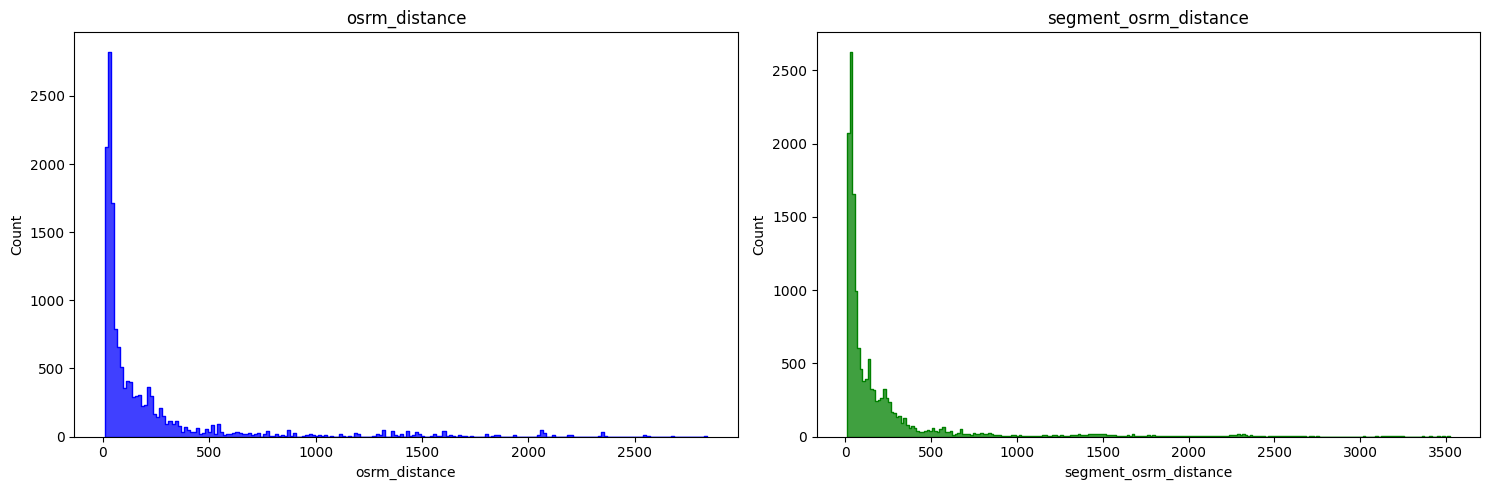

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df2['osrm_distance'], element = 'step', color = 'blue', ax=axs[0])
axs[0].set_title('osrm_distance')

sns.histplot(df2['segment_osrm_distance'], element = 'step', color = 'green', ax=axs[1])
axs[1].set_title('segment_osrm_distance')

plt.tight_layout()
plt.show()

Checking Normality using Q-Q Plot

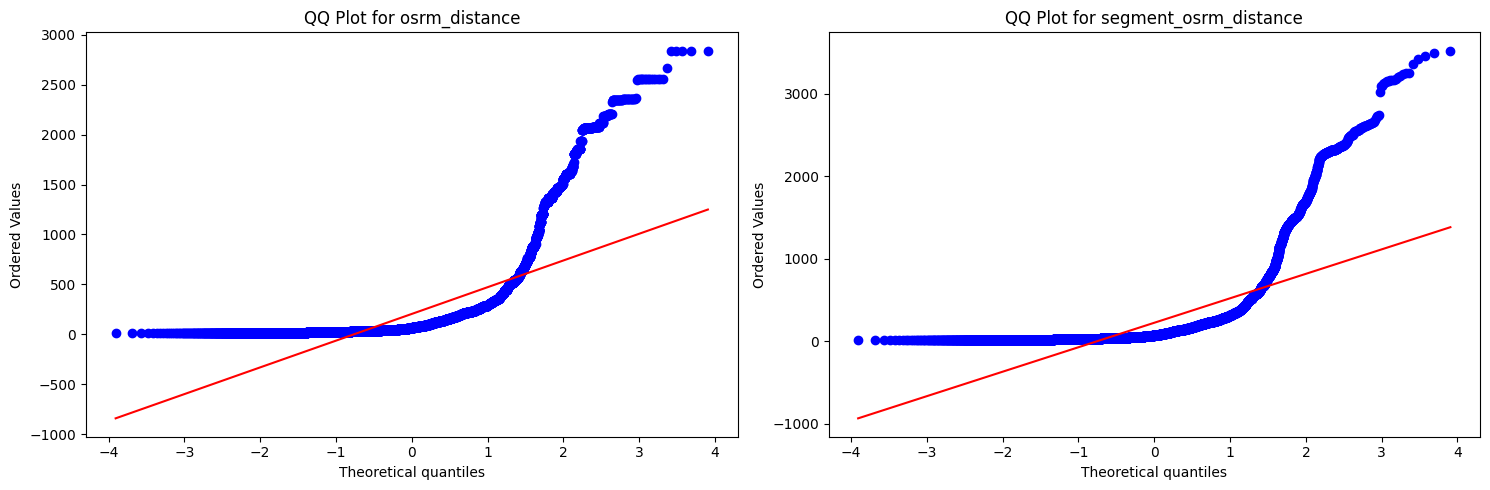

In [ ]:
import scipy.stats as stats
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

stats.probplot(df2['osrm_distance'], plot=axs[0])
axs[0].set_title('QQ Plot for osrm_distance')

stats.probplot(df2['segment_osrm_distance'], plot=axs[1])
axs[1].set_title('QQ Plot for segment_osrm_distance')

plt.tight_layout()
plt.show()

It is evident that above plots that the samples don't follow normal distribution.

Applying *Shapiro-Wilk* test for normality

 - Ho : The sample follows normal distribution

 - Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df2['osrm_distance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'osrm_distance' looks Gaussian (fail to reject Ho)")
else:
    print("'osrm_distance' does not look Gaussian (reject Ho)")

stat, p = shapiro(df2['segment_osrm_distance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print("'segment_osrm_distance' looks Gaussian (fail to reject Ho)")
else:
    print("'segment_osrm_distance' does not look Gaussian (reject Ho)")

Statistics=0.522, p=0.000
'osrm_distance' does not look Gaussian (reject Ho)
Statistics=0.507, p=0.000
'segment_osrm_distance' does not look Gaussian (reject Ho)


It is now obvious that both 'osrm_distance' & 'segment_osrm_distance' **don't** follow Normal distribution

Homogeneity of Variances using Levene's test

In [ ]:
from scipy.stats import levene

stat, p = levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Variances for 'osrm_distance' and 'segment_osrm_distance' are equal (fail to reject H0)")
else:
    print("Variances for 'osrm_distance' and 'segment_osrm_distance' are not equal (reject H0)")

Statistics=13.641, p=0.000
Variances for 'osrm_distance' and 'segment_osrm_distance' are not equal (reject H0)


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform Kruskal-Wallis test.

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(df2['osrm_distance'], df2['segment_osrm_distance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'osrm_distance' and 'segment_osrm_distance' are equal (fail to reject H0)")
else:
    print("'osrm_distance' and 'segment_osrm_distance' are not equal (reject H0)")

Statistics=58.357, p=0.000
'osrm_distance' and 'segment_osrm_distance' are not equal (reject H0)


#### **Observations**

Since p-value < alpha therfore it can be concluded that `osrm_distance` and `segment_osrm_distance` are **"Not Similar"**

### Hypothesis Testing between `osrm_time` and `segment_osrm_time`

Formulation of Hypothesis

  • `Null Hypothesis (Ho)` : There is **"No"** difference between **'osrm_time' and 'segment_osrm_time'**

  • `Alternate Hypothesis (Ha)` : There **'is'** difference between **'osrm_time' and 'segment_osrm_time'**



Checking Normality

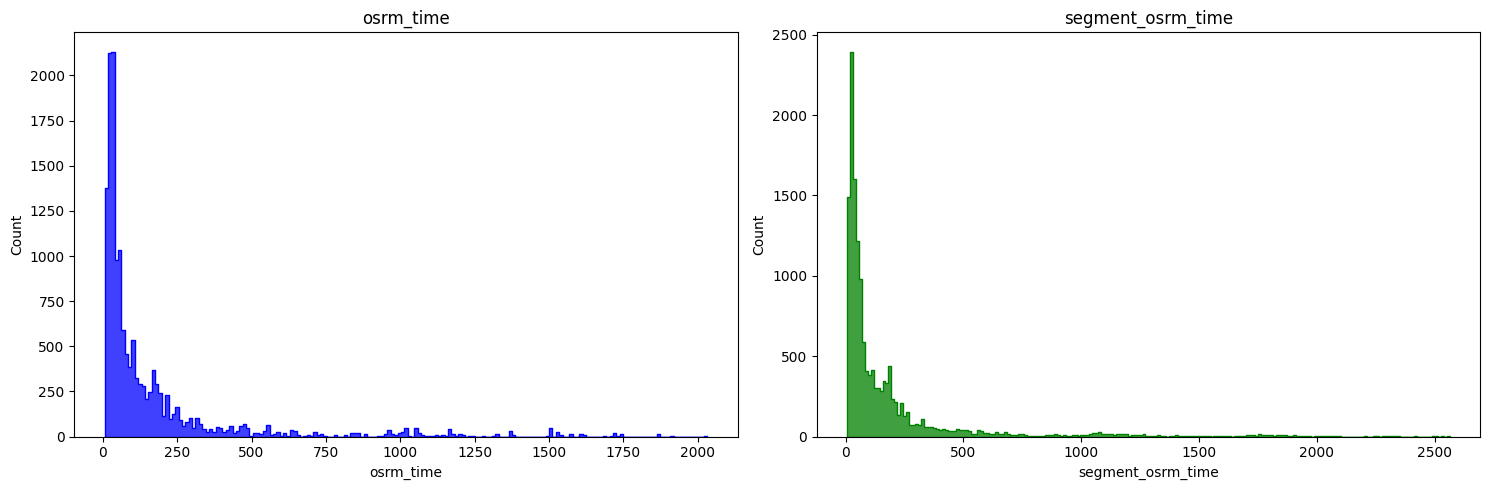

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df2['osrm_time'], element = 'step', color = 'blue', ax=axs[0])
axs[0].set_title('osrm_time')

sns.histplot(df2['segment_osrm_time'], element = 'step', color = 'green', ax=axs[1])
axs[1].set_title('segment_osrm_time')

plt.tight_layout()
plt.show()

Checking Normality using Q-Q Plot

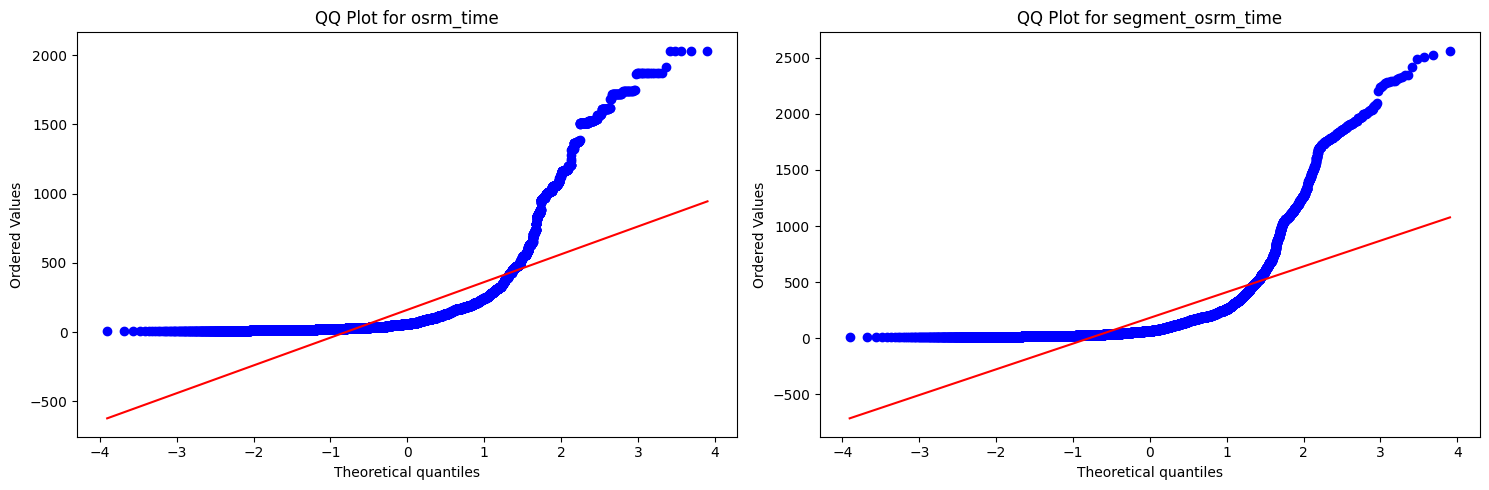

In [ ]:
import scipy.stats as stats
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

stats.probplot(df2['osrm_time'], plot=axs[0])
axs[0].set_title('QQ Plot for osrm_time')

stats.probplot(df2['segment_osrm_time'], plot=axs[1])
axs[1].set_title('QQ Plot for segment_osrm_time')

plt.tight_layout()
plt.show()

It is evident that above plots that the samples don't follow normal distribution.

Applying *Shapiro-Wilk* test for normality

 - Ho : The sample follows normal distribution

 - Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df2['osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'osrm_time' looks Gaussian (fail to reject Ho)")
else:
    print("'osrm_time' does not look Gaussian (reject Ho)")

stat, p = shapiro(df2['segment_osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print("'segment_osrm_time' looks Gaussian (fail to reject Ho)")
else:
    print("'segment_osrm_time' does not look Gaussian (reject Ho)")

Statistics=0.546, p=0.000
'osrm_time' does not look Gaussian (reject Ho)
Statistics=0.532, p=0.000
'segment_osrm_time' does not look Gaussian (reject Ho)


It is now obvious that both 'osrm_time' & 'segment_osrm_time' don't follow Normal distribution

Homogeneity of Variances using Levene's test

In [ ]:
from scipy.stats import levene

stat, p = levene(df2['osrm_time'], df2['segment_osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("Variances for 'osrm_time' and 'segment_osrm_time' are equal (fail to reject H0)")
else:
    print("Variances for 'osrm_time' and 'segment_osrm_time' are not equal (reject H0)")

Statistics=28.539, p=0.000
Variances for 'osrm_time' and 'segment_osrm_time' are not equal (reject H0)


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform Kruskal-Wallis test.

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(df2['osrm_time'], df2['segment_osrm_time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("'osrm_time' and 'segment_osrm_time' are equal (fail to reject H0)")
else:
    print("'osrm_time' and 'segment_osrm_time' are not equal (reject H0)")

Statistics=85.223, p=0.000
'osrm_time' and 'segment_osrm_time' are not equal (reject H0)


#### **Observations**

Since p-value < alpha therfore it can be concluded that `osrm_time` and `segment_osrm_time` are **"Not Similar"**



---



## **Detecting & Handling Outliers**

In [ ]:
df2[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


Plotting Histograms for all Numerical Variables

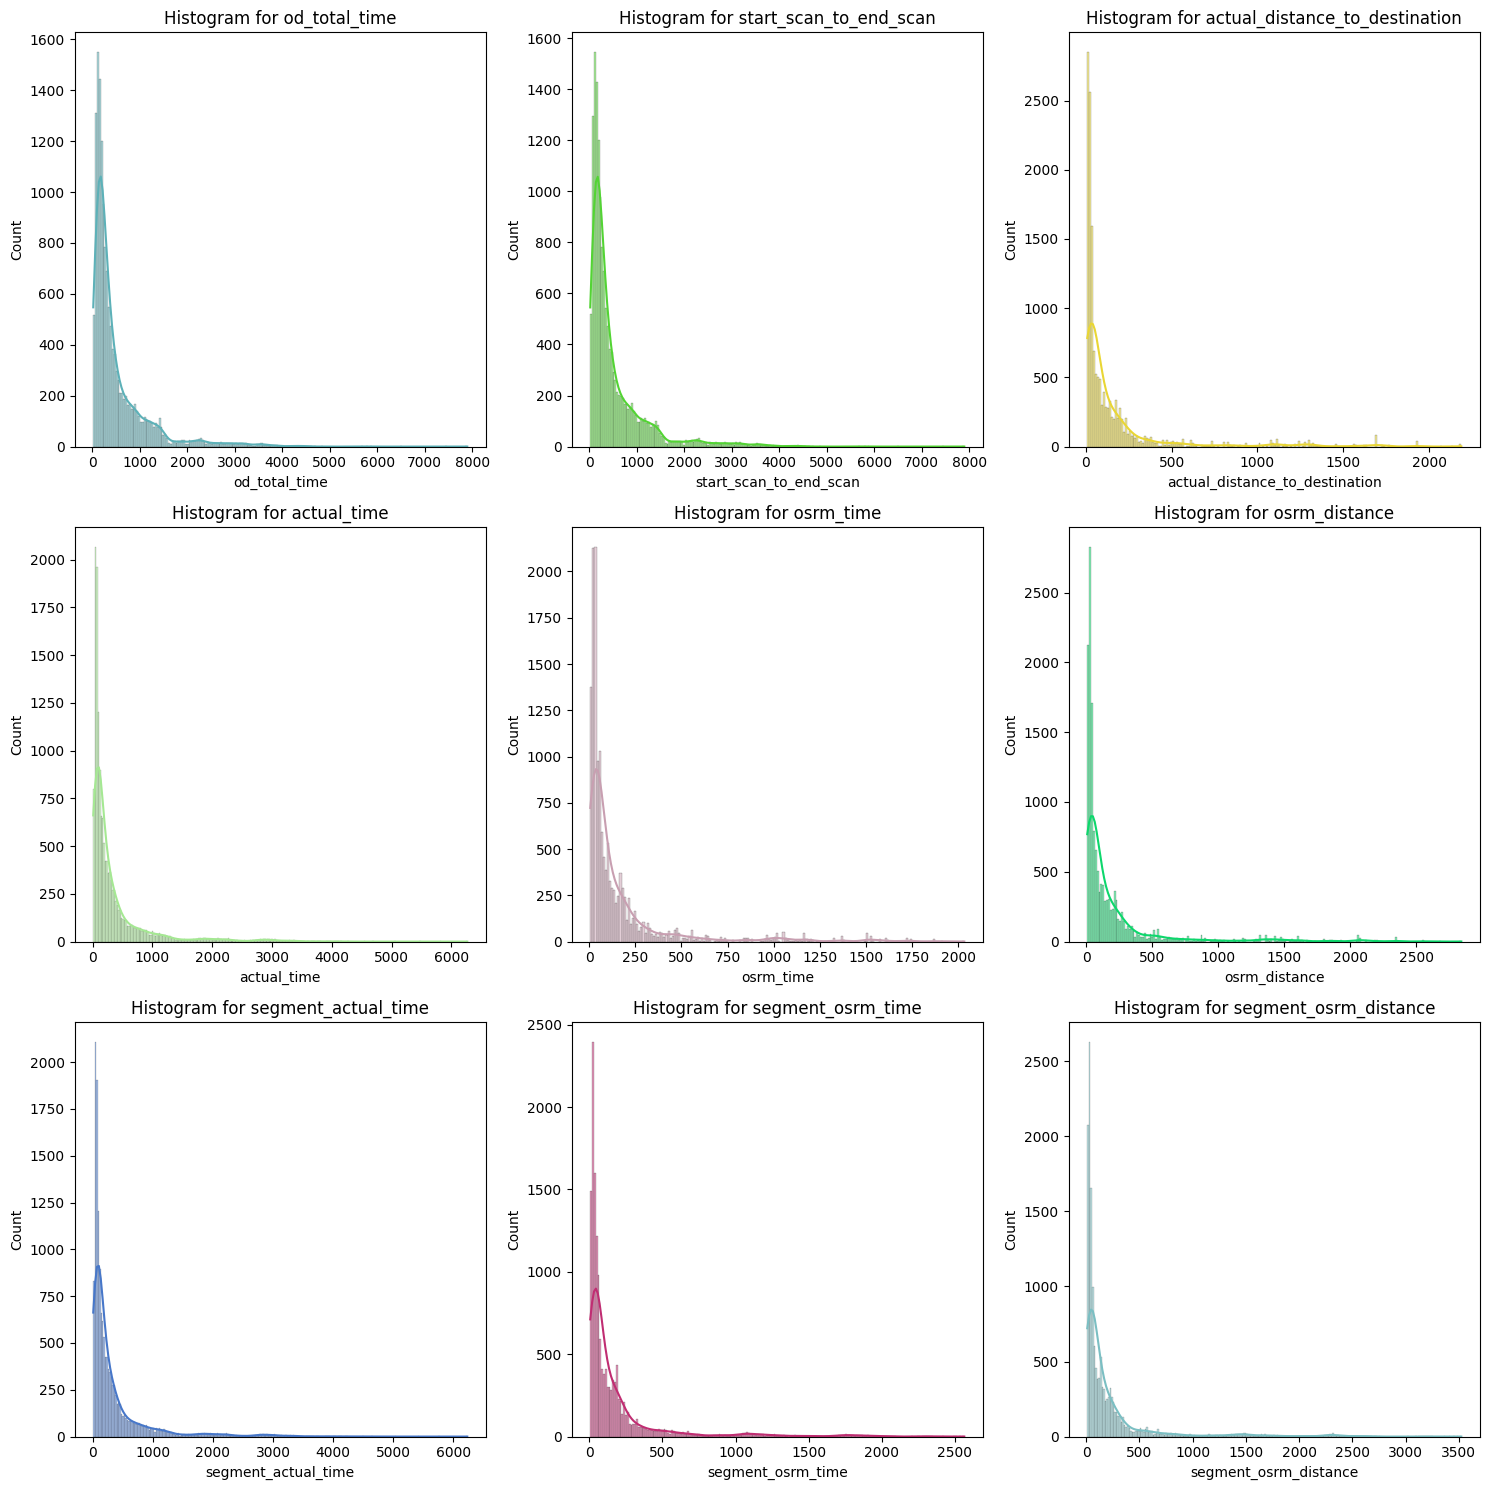

In [ ]:
n = len(numerical_cols)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

colors = np.random.rand(n, 3)

for i, col in enumerate(numerical_cols):
    r, c = i // ncols, i % ncols
    sns.histplot(df2[col], ax=axs[r, c], color=colors[i], kde=True)
    axs[r, c].set_title('Histogram for '+col)

if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

**Observation**
- It is evident that the data is **skewed** for all the numerical columns

Plotting Box-Plots for detecting outliers

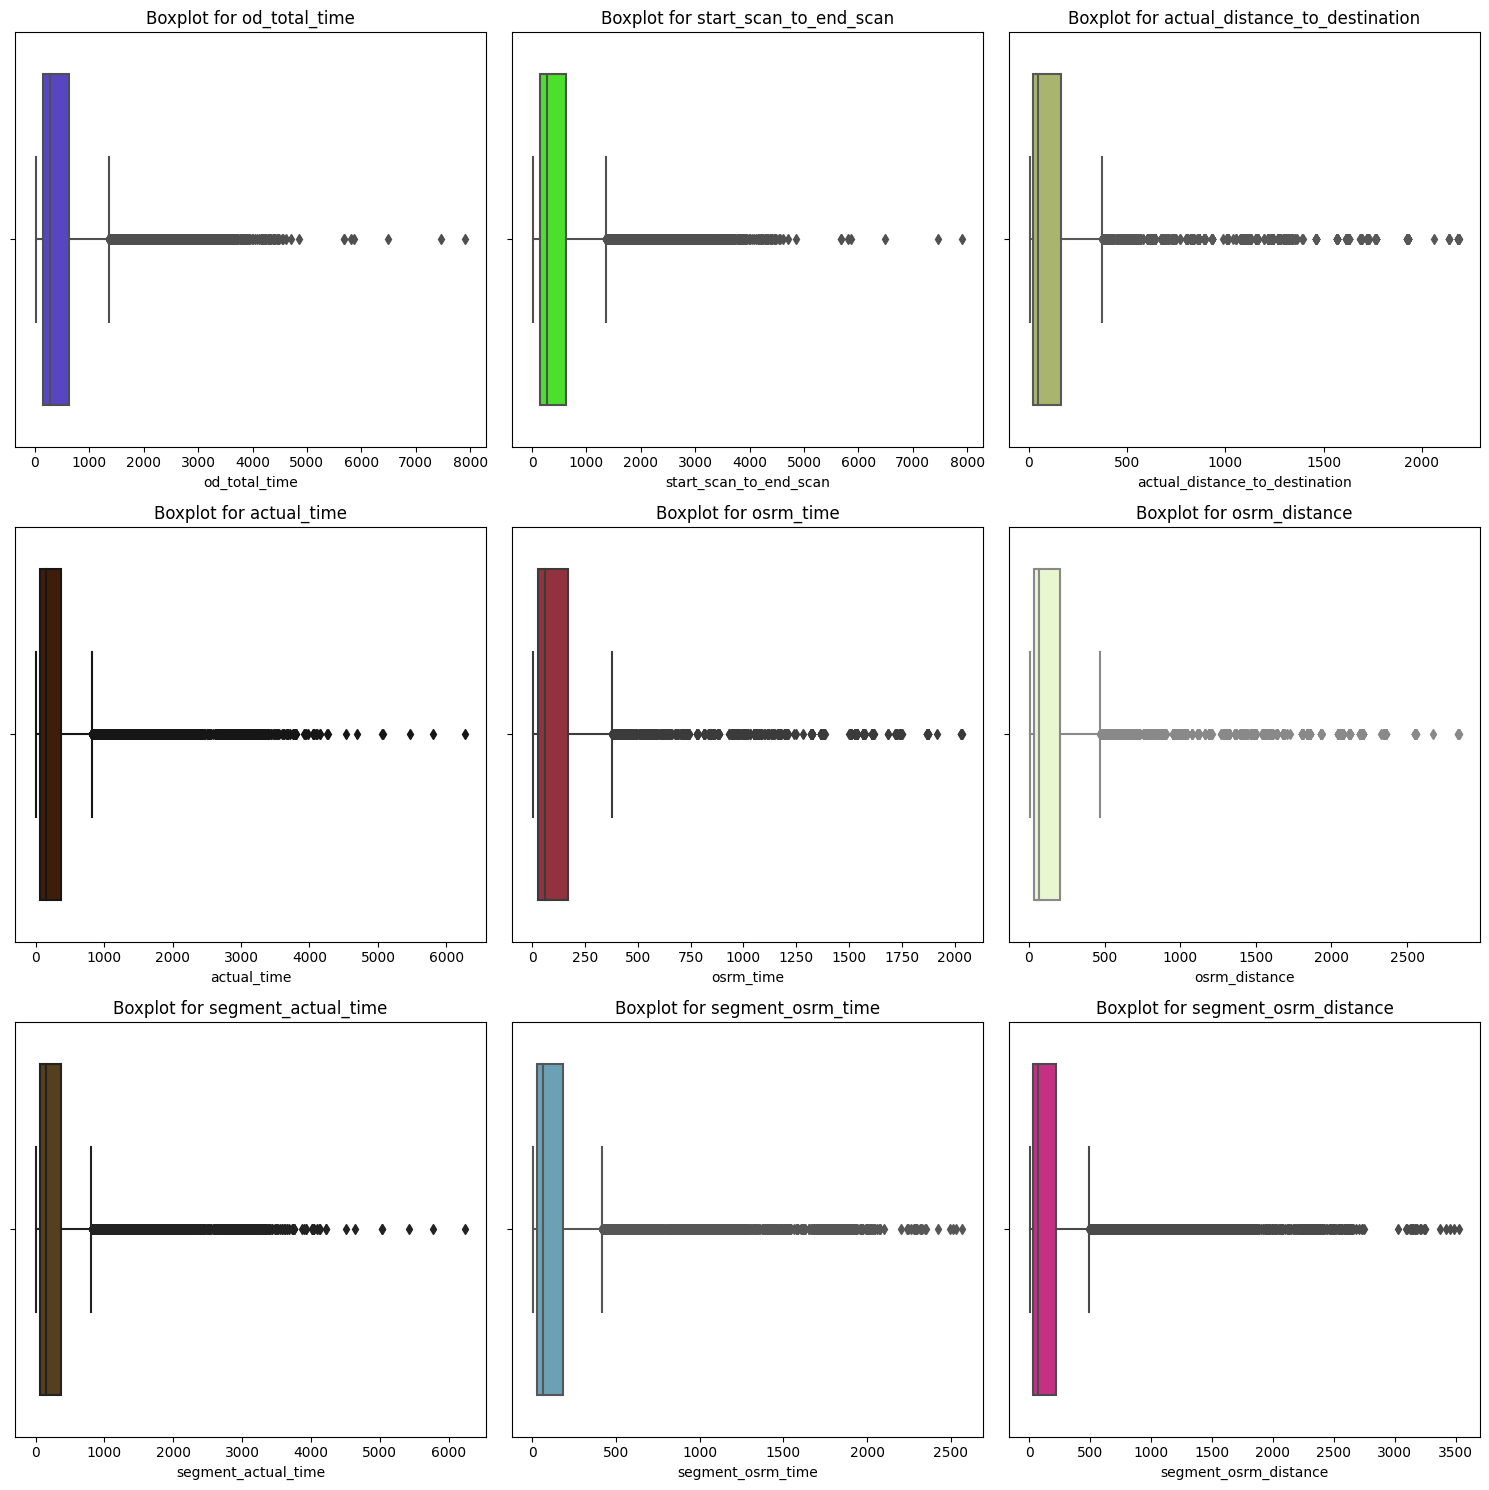

In [ ]:
n = len(numerical_cols)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

colors = np.random.rand(n, 3)

for i, col in enumerate(numerical_cols):
    r, c = i // ncols, i % ncols
    sns.boxplot(x=df2[col], ax=axs[r, c], color=colors[i])
    axs[r, c].set_title('Boxplot for '+col)

if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

**Observation**
- It is evident that there are outliers in all the numerical columns

Detecting Outliers using IQR

In [ ]:
def calculate_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df.loc[(df[col] < LB) | (df[col] > UB)]
    return pd.Series([Q1, Q3, IQR, LB, UB, outliers.shape[0]], index=['Q1', 'Q3', 'IQR', 'LB', 'UB', 'Number of outliers'])

df_iqr = pd.DataFrame({col: calculate_iqr(df2, col) for col in numerical_cols})
df_iqr.T

,Q1,Q3,IQR,LB,UB,Number of outliers
od_total_time,0.016030,0.077469,0.061439,-0.076129,0.169628,1275.0
start_scan_to_end_scan,0.016000,0.077333,0.061333,-0.076000,0.169333,1282.0
actual_distance_to_destination,0.006326,0.070993,0.064667,-0.090675,0.167993,1452.0
actual_time,0.009271,0.057225,0.047954,-0.062660,0.129156,1648.0
osrm_time,0.011352,0.079961,0.068608,-0.091560,0.182873,1506.0
osrm_distance,0.007659,0.069788,0.062129,-0.085534,0.162982,1522.0
segment_actual_time,0.009163,0.057065,0.047902,-0.062691,0.128918,1646.0
segment_osrm_time,0.009382,0.069586,0.060203,-0.080923,0.159891,1485.0
segment_osrm_distance,0.006688,0.059037,0.052348,-0.071835,0.137559,1550.0


**Observations**
- We can drop the outliers but its not recommended because we will lose information.
- In this case outliers in our dataset could be genuine. It's advisable to only eliminate outliers when there's a valid justification for it. Some outliers may reflect the inherent variability in the population, and these should be retained in the dataset.



---



## **Encoding of Categorical Variables**

**one-hot** encoding of categorical variables

In [ ]:
df2.route_type.value_counts()

Carting    8906
FTL        5881
Name: route_type, dtype: int64

performing one-hot encoding on categorical column *route_type*


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

performing one-hot encoding on categorical column *data*


In [ ]:
label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])



---



## **Normalizing / Standardizing the numerical features**

Normalizing Numerical Columns using **MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [ ]:
df2[numerical_cols]

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625
3,0.009781,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074
4,0.088238,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185
...,...,...,...,...,...,...,...,...,...
14782,0.029786,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872
14783,0.004715,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996
14784,0.050623,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262
14785,0.041277,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020




---


## **Conclusions**

- Trip Creation Patterns:
   - Trips start increasing from 12 pm.
   - Considerable dip in trip creations at 9 pm, but they start increasing again till 10 pm.
   - Least number of trips are created between 10 am - 12 pm.

- Trip Creation by Day and Week:
   - Most trips are created on Wednesday, followed by Saturday.
   - Least number of trips are created on Sunday.
   - Most trips are created in the middle of the month.
   - Least number of trips are created at the start and end of the month.
   - Most trips are created in the 38th week.

- Trip Creation by Month:
   - September has the highest number of trips.

- Transportation Modes:
   - Around 60.23% of trips are transported by Carting, and the remaining 39.77% are transported by FTL (Full Truck Load).

- Source State and City:
   - Top 5 source states: Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.
   - States with the least number of trips as the source state: Dadra and Nagar Haveli, Pondicherry, Mizoram, Nagaland, and Arunachal Pradesh.
   - Top 5 source cities: Mumbai, Gurgaon, Delhi, Bangalore, Bhiwandi, Bengaluru.

- Destination State and City:
   - Top 5 destination states: Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh.
   - States with the least number of trips as the destination state: Meghalaya, Mizoram, Tripura, Daman & Diu, Nagaland.
   - Top 5 destination cities: Mumbai, Bengaluru, Gurgaon, Delhi, Chennai.

- Insights from Hypothesis Testing:
    - Features `start_scan_to_end_scan` and `od_total_time` are statistically **similar**.

    - Features `actual_time` & `osrm_time` are statitically **different**.

    - Features `actual_time` and `segment_actual_time` are statistically **similar**.

    - Features `osrm_distance` and `segment_osrm_distance` are statistically **different** from each other.

    - Both the `osrm_time` & `segment_osrm_time` are statistically **different**.



## **Recommendations**

 - Offering promotions or incentives for trips created between 10 am - 12 pm to boost activity during this period.Focus on marketing efforts during the 9 pm - 10 pm time slot to counter the dip in trip creations.


- Since Wednesday and Saturday are the busiest days, consider running special promotions or discounts on these days to attract more users.
Target marketing efforts towards Sundays to increase trip creations on this day.

- Since Carting is the preferred mode of transportation, consider expanding or enhancing services related to Carting to meet the demand. Additionally, evaluate if there are opportunities to further promote FTL services.

- Focus on strengthening operations and marketing efforts in the top 5 source states and cities (Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana).Consider strategies to increase activity in states with the least number of trips as the source state (Dadra and Nagar Haveli, Pondicherry, Mizoram, Nagaland, and Arunachal Pradesh).

- Similarly, prioritize operations and marketing efforts in the top 5 destination states and cities (Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh).Explore opportunities to increase activity in states with the least number of trips as the destination state (Meghalaya, Mizoram, Tripura, Daman & Diu, Nagaland).

- Enhancements are required in the OSRM trip planning system to address existing discrepancies and provide optimal results for transporters.

- There is a noticeable difference between 'osrm_time' and 'actual_time'. It's crucial for the team to minimize this difference to improve delivery time predictions, thereby enhancing customer experience with more accurate delivery time estimates.

- The 'osrm_distance' and the actual distance covered during deliveries are not aligning. This could be due to delivery personnel not adhering to the predefined route or potential shortcomings in the OSRM device's route prediction based on distance, traffic, and other factors. This issue needs to be addressed by the team to prevent late deliveries and ensure efficient route planning.



---

